## Importing the libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

### Importing the dataset

Each row correponds to a customer

Feature: spending score (evaluation metric) --> measure how much each customer spends

We will identify some patterns within the customer base

In [ ]:
data = pd.read_csv("Mall_Customers.csv")

# Unsupervised learning has only X (features)

# feature - customer id is not needed for our model (exclude it)

# Note:
# To visualize our clusters, we will need 2 features from our dataset (One axis per feature). (2 features --> 2D plot), so
# for the time being, we will not consider other features other than 2 chosen.

# Features chosen -- Annual Income (index 3), Spending Score (index 4)
X = data.iloc[:, [3, 4]].values

# Take all rows, of column index 3 and 4

Also, since there is no y, we won't be splitting our dataset into Train and Test set

X[0] --> Annual Income

X[1] --> Spending Score

## Using the elbow method to find the optimal number of clusters, K

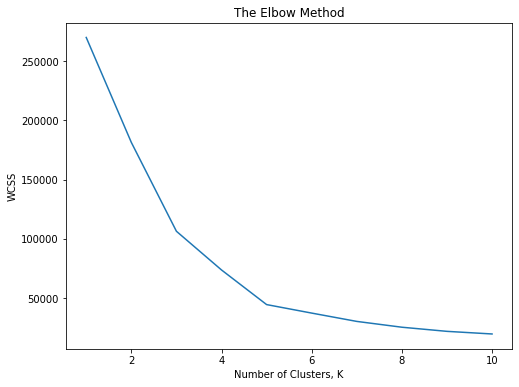

In [ ]:
# Implement elbow method by running K-Means algorithm several times with different values of K

from sklearn.cluster import KMeans
wcss = []

# loop will run K-Means algorithm with different values of K (from 1 to 10)
# we will calculate WCSS for each cluster each time the algorithm runs

# Graph ==> y - WCSS for each cluster , x - no. of clusters K

for i in range(1,11):
  # Create object of KMeans Class (Model)
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
  # k-means++ --> an initiliazation trick to prevent the model from falling into the Random Initialization trap
  # random_state = 42 --> results will be reproducable

  # Train the model
  kmeans.fit(X)

  # calculate WCSS
  wcss.append(kmeans.inertia_) # inertia_ is an attribute of KMeans class

# Plot the graph of the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters, K")
plt.ylabel("WCSS")
plt.show()

From the graph, we can see that the optimal value of K = 5

(Distortion of graph decreases after K=5, i.e. graph slowly becomes flat)

## Training the K-Means model on the dataset

In [ ]:
K = 5

kmeans = KMeans(n_clusters=K, init = 'k-means++', random_state=42)

# Build the dependent variable - values are numbers of clusters

# 1 -- cluster 1, 2 -- cluster 2, 3 -- cluster 3 .....
# each cluster represents a different set(group) of customers
# customers will be grouped due to their similar qualities

# fit_predict() --> trains model, and also returns y(dependent variable)
y_kmeans = kmeans.fit_predict(X) # just like y_pred

In [ ]:
print(y_kmeans)
# all the clusters that each customer belongs to

# first customer --> belongs to cluster 3, second customer --> cluster 0, third customer --> cluster 3, .......

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising the clusters

with their centroids

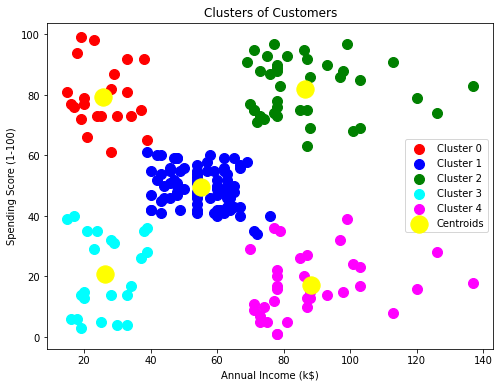

In [ ]:
# Scatter plot each cluster separately
plt.figure(figsize=(8, 6))

# 1) Plot the Clusters

# X --> Annual income, X[0]. y --> Spending Score, X[1]
# X[y_kmeans == 0, 0] --> select all customers from Annual Income that belong to Cluster 0
# X[y_kmeans == 0, 1] --> select all customers from Spending Score that belong to Cluster 0

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c = 'red', label='Cluster 0') 

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c = 'blue', label='Cluster 1') 
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c = 'green', label='Cluster 2') 
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c = 'cyan', label='Cluster 3') 
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c = 'magenta', label='Cluster 4') 

# 2) Plot the Centroids of each cluster

# cluster_centers is an attribute of KMeans class. It is a 2D array where rows=different centroids, column = co-ordinates of centroids

# cluster_centers[:, 0] --> take all rows, then first column of X - X[0] (x co-ordinate of centroid)
# cluster_centers[:, 1] --> take all rows, then second column of X - X[1] (y co-ordinate of centroid)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

## Conclusion

Cluster 0 --> customers have low annual income, and high spending score

Cluster 4 --> Customers have high annual income, and has low spending score

### Some Marketing/Business Strategies

Target customers in cluster 2 because they have high income, and they spend a lot. Thus, more profit can be generated for the business. So we can target them with new deals and offers

For new deals and offers, do not target(or pressurize) customers in cluster 0. These customers show loyalty to the business and must be retained.

We can target some customers in cluster 4 in order to attract them to the business. 
